# 1. Loading Packages

In [1]:
import pandas as pd
import numpy as np     # mathematical calculation
import seaborn as sns  # visualization
import matplotlib.pyplot as plt # plotting graphs
import random
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
#path = 'd:/Python/Loan_Prediction/'
path = 'd:/Python/Loan prediction/'

#path = 'c:/Users/Dell/Documents/Python Scripts/'
os.chdir(path) 
os.getcwd()

'd:\\Python\\Loan prediction'

# 2. Reading Data

In [3]:
# train = pd.read_csv("train_ctrUa4K.csv")
# test = pd.read_csv("test_lAUu6dG.csv")

train = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [4]:
len(train), len(test)

(614, 367)

In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
train.shape, test.shape

((614, 13), (367, 12))

# 3. Univariate Analysis

It is the simplest form of analyzing data where we examine each variable 
individually. 
For categorical features we can use frequency table or bar plots
which will calculate the number of each category in a particular variable. 
For numerical features, probability density plots can be used to look at the 
distribution of the variable.

# 3.1 Target variable

In [9]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [10]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
# Normalize can be set to True to print proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [12]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


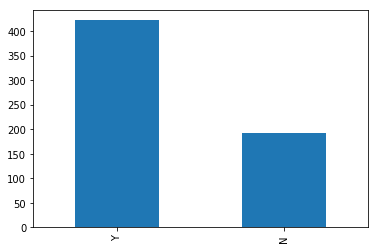

In [13]:
train['Loan_Status'].value_counts().plot.bar()

# 3.2 Independent Variable (Categorical) - Frequency table

Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

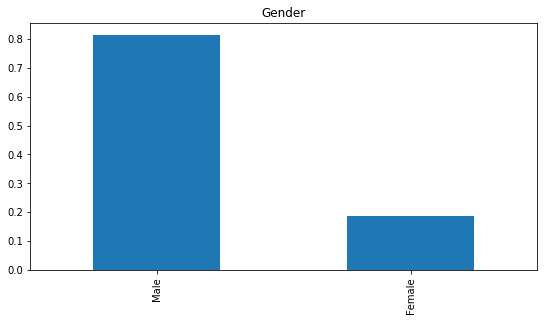

In [14]:
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize = (20,10), title='Gender')

<Figure size 432x288 with 0 Axes>

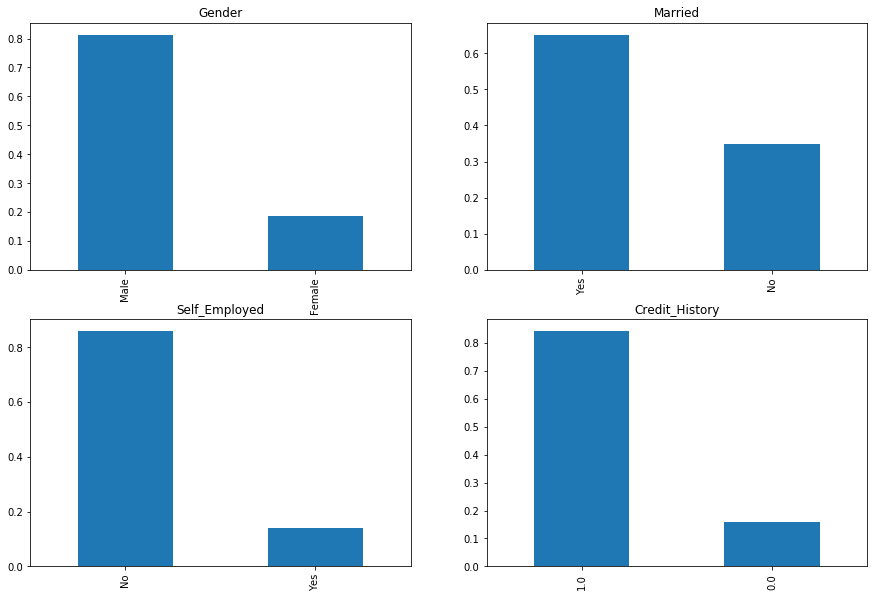

In [15]:
plt.figure(1) 
plt.figure(figsize=(15,10)) 
# subplot(nrows, ncols, index)
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender') 

plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title='Married') 

plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed') 

plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

plt.show()

# 3.3 Independent Variable (Ordinal) - Frequency table 

Ordinal features: Variables in categorical features having some order involved 
    (Dependents, Education, Property_Area)

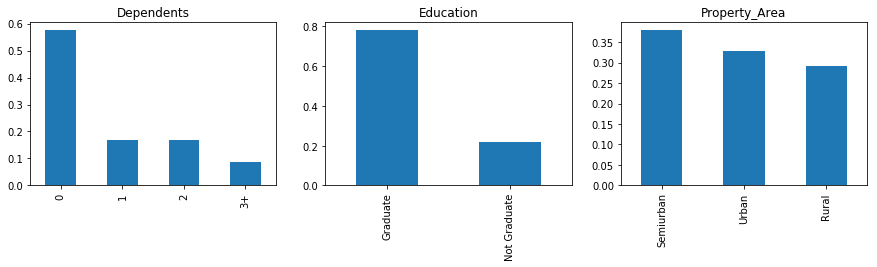

In [16]:
plt. figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize =(15,3), title ='Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize = True).plot.bar(title = 'Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize = True).plot.bar(title = 'Property_Area')

# 3.4 Independent Variable (Numerical) -Distribution

Numerical features: These features have numerical values 
(ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

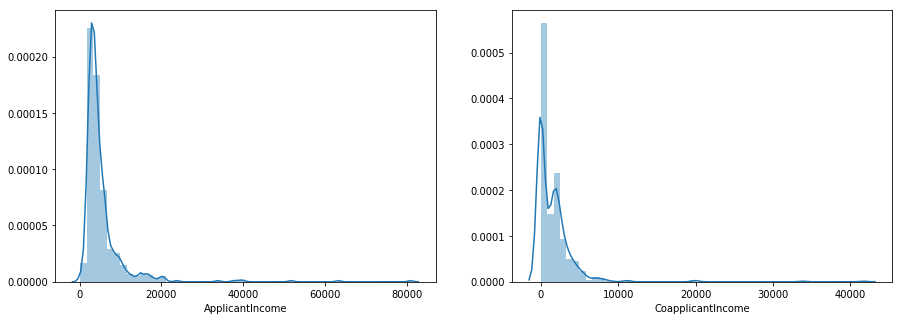

In [17]:
plt.figure(1,figsize=(15,5))
# first import matplotlib and use it to set the size of the figure
#plt.figure(figsize=(15,5)) 
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
sns.distplot(train['CoapplicantIncome'])
plt.show()

The distribution of applicant income is towards left: 
  - which means it is not normally distributed. 
  - We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

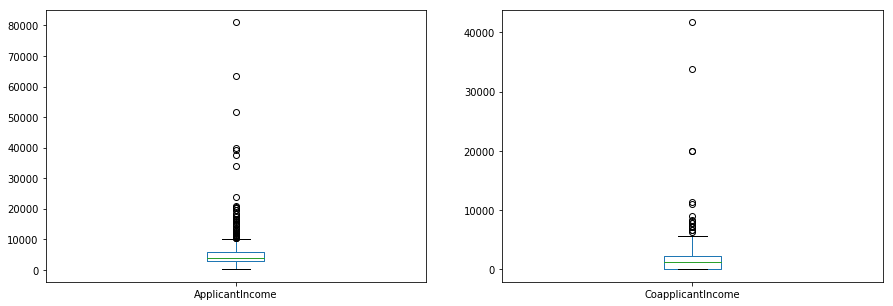

In [18]:
plt.figure(1, figsize = (15,5))
plt.subplot(121)
train['ApplicantIncome'].plot.box()

plt.subplot(122)
train['CoapplicantIncome'].plot.box()

From boxplot can be seen the presence of a lot of outliers/extreme values. 
Perhaps this is due to a different level of education.

Text(0.5, 0.98, '')

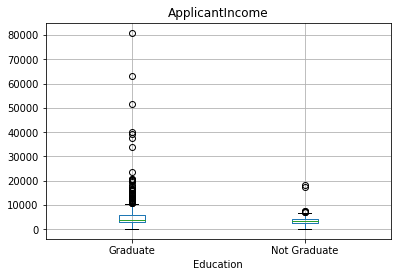

In [19]:
train.boxplot(column = 'ApplicantIncome', by = 'Education')
plt.suptitle("")

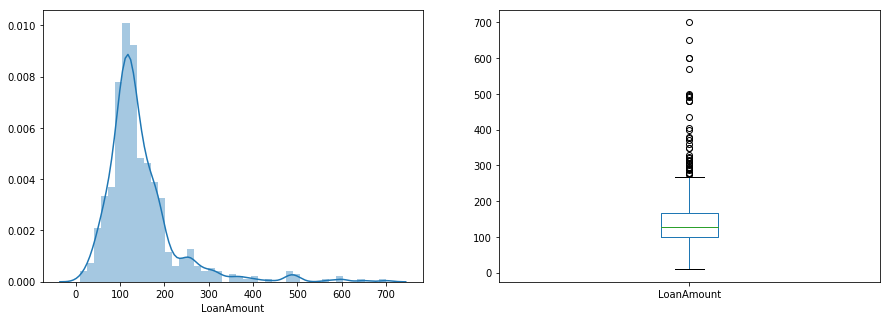

In [20]:
plt.figure(1, figsize = (15,5))

plt.subplot(121)
df = train['LoanAmount'].dropna()
sns.distplot(df)

plt.subplot(122)
df.plot.box()


In [21]:
len(df)

592

# 4. Bivariate Analysis

# 4.1 Categorical Independent Variable vs Target Variable

Stacked bar plot now which will give us the proportion of approved and unapproved loans.

# 4.1.1 Gender - Loan_Status

In [22]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.head()

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [23]:
Gender.sum()

Loan_Status
N    187
Y    414
dtype: int64

In [24]:
Gender.count()

Loan_Status
N    2
Y    2
dtype: int64

In [25]:
Gender.sum(1)

Gender
Female    112
Male      489
dtype: int64

In [26]:
Gender.div(Gender.sum())

Loan_Status,N,Y
Gender,,
Female,0.197861,0.181159
Male,0.802139,0.818841


In [27]:
Gender.div(Gender.sum().astype(float))

Loan_Status,N,Y
Gender,,
Female,0.197861,0.181159
Male,0.802139,0.818841


In [28]:
Gender.div(Gender.sum(1).astype(float),axis =0)

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


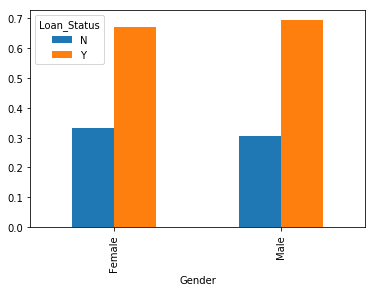

In [29]:
Gender.div(Gender.sum(1).astype(float),axis =0).plot.bar()

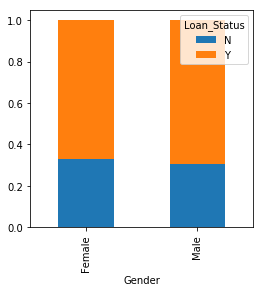

In [30]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked = True, figsize =(4,4))

Female parameter: 
    - total      = 112 (100%)
    - approved   =  75 ( 67%)
    - unapproved =  37 ( 33%)
Male parameter: 
    - total      = 489 (100%)
    - approved   = 339 ( 70%)
    - unapproved = 150 ( 30%)


Approved parameter: 
    - total      = 414 (100%)
    - Female     =  75 ( 18%)
    - Male       = 339 ( 82%)
Unapproved parameter: 
    - total      = 187 (100%)
    - Female     =  37 ( 20%)
    - Male       = 150 ( 80%)
    

# 4.1.2 Married, Dependents, Education, Self_Employed - Loan_Status

In [31]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 

In [32]:
Married.head()

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


In [33]:
Dependents.head()

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


In [34]:
Education.head()

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [35]:
Self_Employed.head()

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


In [36]:
Married.div(Married.sum())

Loan_Status,N,Y
Married,,
No,0.411458,0.319809
Yes,0.588542,0.680191


In [37]:
Married.div(Married.sum(1).astype(float), axis =0)

Loan_Status,N,Y
Married,,
No,0.370892,0.629108
Yes,0.283920,0.716080


In [38]:
Married.div(Married.sum().astype(float), axis =1)

Loan_Status,N,Y
Married,,
No,0.411458,0.319809
Yes,0.588542,0.680191


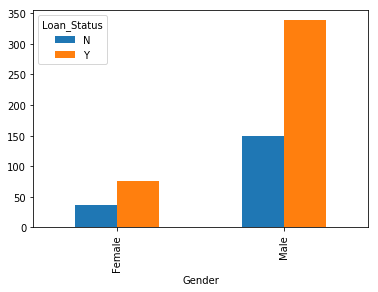

In [39]:
Gender.plot.bar()

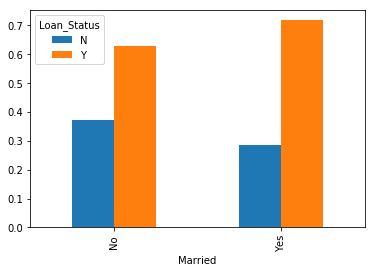

In [40]:
Married.div(Married.sum(1), axis=0).plot.bar()

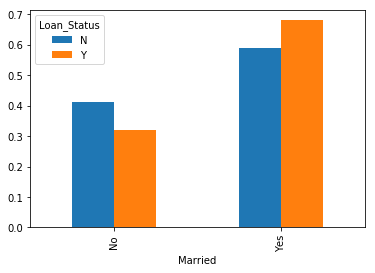

In [41]:
Married.div(Married.sum(), axis=1).plot.bar()

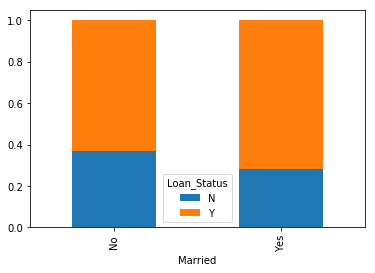

In [42]:
Married.div(Married.sum(1), axis=0).plot(kind="bar", stacked = True)

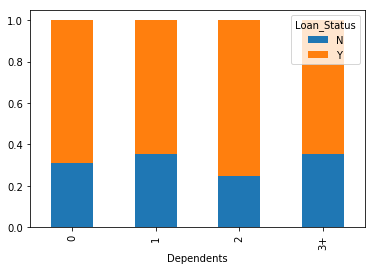

In [43]:
Dependents.div(Dependents.sum(1), axis=0).plot(kind="bar", stacked = True)

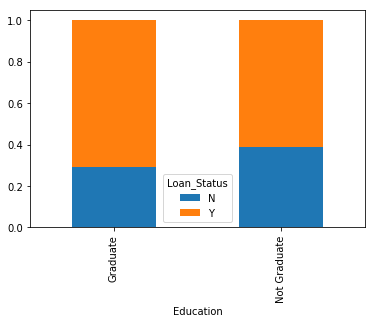

In [44]:
Education.div(Education.sum(1), axis=0).plot(kind="bar", stacked = True)

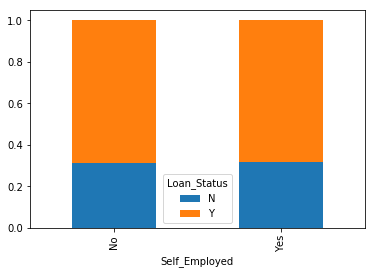

In [45]:
Self_Employed.div(Self_Employed.sum(1), axis=0).plot(kind="bar", stacked = True)

# 4.1.3 Married, Dependents, Education, Self_Employed - Loan_Status

In [46]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])

In [47]:
Credit_History.div(Credit_History.sum())

Loan_Status,N,Y
Credit_History,,
0.0,0.458101,0.018182
1.0,0.541899,0.981818


In [48]:
Credit_History.div(Credit_History.sum(1), axis =0)

Loan_Status,N,Y
Credit_History,,
0.0,0.921348,0.078652
1.0,0.204211,0.795789


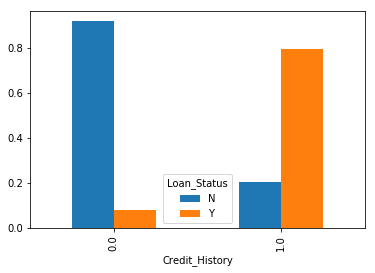

In [49]:
Credit_History.div(Credit_History.sum(1), axis = 0).plot(kind = "bar")

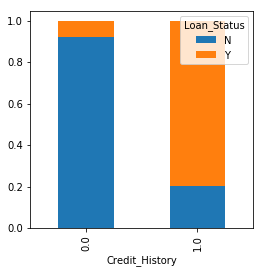

In [50]:
Credit_History.div(Credit_History.sum(1), axis = 0).plot(kind = "bar", stacked =True, figsize = (4,4))

In [51]:
Property_Area.div(Property_Area.sum())

Loan_Status,N,Y
Property_Area,,
Rural,0.359375,0.260664
Semiurban,0.281250,0.424171
Urban,0.359375,0.315166


In [52]:
Property_Area.div(Property_Area.sum(1), axis = 0)

Loan_Status,N,Y
Property_Area,,
Rural,0.385475,0.614525
Semiurban,0.231760,0.768240
Urban,0.341584,0.658416


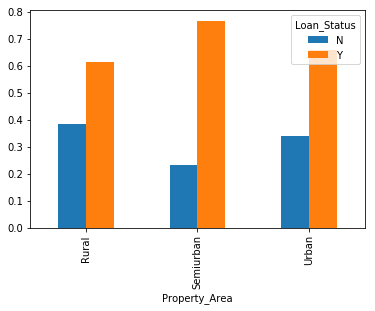

In [53]:
Property_Area.div(Property_Area.sum(1), axis = 0).plot(kind = 'bar')

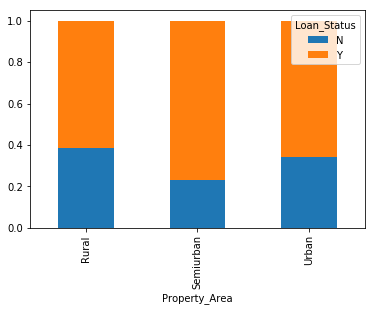

In [54]:
Property_Area.div(Property_Area.sum(1), axis = 0).plot(kind = 'bar', stacked = True)

# 4.2 Numerical Independent Variable vs Target Variable

Mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

In [55]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [56]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [57]:
train.groupby('Loan_Status').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,151.220994,344.064516,0.541899
Y,5384.068720,1504.516398,144.294404,341.072464,0.981818


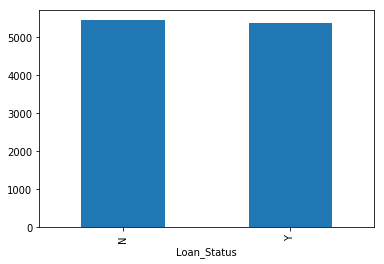

In [58]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [59]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [60]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [61]:
bins =[-1, 2500, 4000, 6000, 81000]
group =['Low', 'Average', 'High', 'Very high']
train['Income_bins'] = pd.cut(train['ApplicantIncome'], bins, labels =group)
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,High
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,Low
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,Average
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,High
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,Very high


In [62]:
train['Income_bins'].value_counts()

Average      226
High         143
Very high    137
Low          108
Name: Income_bins, dtype: int64

In [63]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Income_bins           0
dtype: int64

In [64]:
test['Income_bins'] = pd.cut(test['ApplicantIncome'], bins, labels =group)
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income_bins
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,High
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Average
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,High
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Low
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Average
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,Low
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban,Low
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,Average
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban,Very high
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban,Low


In [65]:
test['Income_bins'].value_counts()

Average      139
High          98
Low           66
Very high     64
Name: Income_bins, dtype: int64

In [66]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Income_bins           0
dtype: int64

In [67]:
test['Income_bins'].isnull()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
337    False
338    False
339    False
340    False
341    False
342    False
343    False
344    False
345    False
346    False
347    False
348    False
349    False
350    False
351    False
352    False
353    False
354    False
355    False
356    False
357    False
358    False
359    False
360    False
361    False
362    False
363    False
364    False
365    False
366    False
Name: Income_bins, Length: 367, dtype: bool

In [68]:
Income_bin = pd.crosstab(train['Income_bins'], train['Loan_Status'])
Income_bin

Loan_Status,N,Y
Income_bins,,
Low,34,74
Average,67,159
High,45,98
Very high,46,91


In [69]:
Income_bin.div(Income_bin.sum(), axis =1)

Loan_Status,N,Y
Income_bins,,
Low,0.177083,0.175355
Average,0.348958,0.376777
High,0.234375,0.232227
Very high,0.239583,0.215640


In [70]:
Income_bin.div(Income_bin.sum(1), axis = 0)

Loan_Status,N,Y
Income_bins,,
Low,0.314815,0.685185
Average,0.296460,0.703540
High,0.314685,0.685315
Very high,0.335766,0.664234


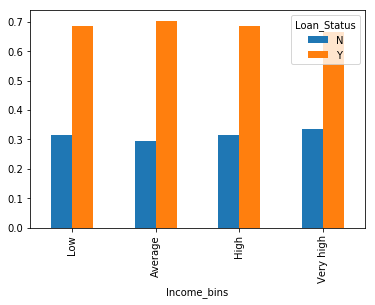

In [71]:
Income_bin.div(Income_bin.sum(1), axis = 0).plot(kind ='bar')

Text(0, 0.5, 'Percentage')

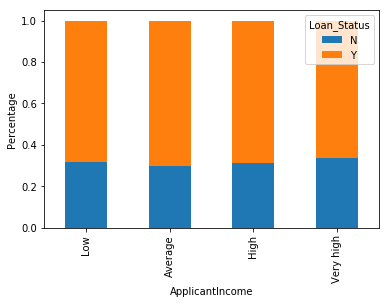

In [72]:
Income_bin.div(Income_bin.sum(1), axis = 0).plot(kind ='bar', stacked = True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

Applicant income does not affect the chances of loan approval.This contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

Let's analyze the coapplicant income:

In [73]:
bins =[0, 2500, 4000, 6000, 81000]
group =['Low', 'Average', 'High', 'Very high']
train['Coapplicant_Income_bins'] = pd.cut(train['CoapplicantIncome'], bins, labels =group)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins,Coapplicant_Income_bins
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Low
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Low
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN


Where CoapplicantIncome = 0 there Coapplicant_Income_bins = 'NaN'-> problematic
We have top make one more bin
from (-1 to    0) = No 
from ( 1 to 2500) = Low

In [74]:
bins_new =[-1,1, 2500, 4000, 6000, 81000]
group_new =['No','Low', 'Average', 'High', 'Very high']
train['Coapplicant_Income_bins'] = pd.cut(train['CoapplicantIncome'], bins_new, labels =group_new)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins,Coapplicant_Income_bins
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,No
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Low
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,No
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Low
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,No


In [75]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Income_bins           0
dtype: int64

In [76]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [77]:
bins_new =[-1,1, 2500, 4000, 6000, 81000]
group_new =['No','Low', 'Average', 'High', 'Very high']
test['Coapplicant_Income_bins'] = pd.cut(test['CoapplicantIncome'], bins_new, labels =group_new)
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income_bins,Coapplicant_Income_bins
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,High,No
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Average,Low
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,High,Low
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Low,Average
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Average,No


In [78]:
test.isnull().sum()

Loan_ID                     0
Gender                     11
Married                     0
Dependents                 10
Education                   0
Self_Employed              23
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  5
Loan_Amount_Term            6
Credit_History             29
Property_Area               0
Income_bins                 0
Coapplicant_Income_bins     0
dtype: int64

In [79]:
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bins'], train['Loan_Status'])
Coapplicant_Income_bin

Loan_Status,N,Y
Coapplicant_Income_bins,,
No,96,177
Low,53,161
Average,24,48
High,11,26
Very high,8,10


In [80]:
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum())

Loan_Status,N,Y
Coapplicant_Income_bins,,
No,0.500000,0.419431
Low,0.276042,0.381517
Average,0.125000,0.113744
High,0.057292,0.061611
Very high,0.041667,0.023697


In [81]:
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1), axis = 0)

Loan_Status,N,Y
Coapplicant_Income_bins,,
No,0.351648,0.648352
Low,0.247664,0.752336
Average,0.333333,0.666667
High,0.297297,0.702703
Very high,0.444444,0.555556


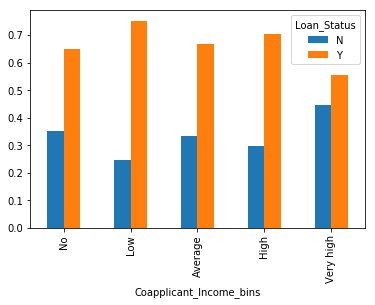

In [82]:
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1), axis = 0).plot(kind ='bar')

Text(0, 0.5, 'Percentage')

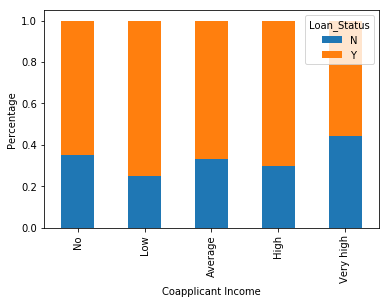

In [83]:
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1), axis = 0).plot(kind ='bar', stacked = True)
plt.xlabel('Coapplicant Income')
plt.ylabel('Percentage')

Make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

In [84]:
train['Total_Income'] = train['CoapplicantIncome'] + train['ApplicantIncome']
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins,Coapplicant_Income_bins,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,No,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Low,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,No,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Low,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,No,6000.0


In [85]:
bins =[0, 2500, 4000, 6000, 81000]
group =['Low', 'Average', 'High', 'Very high']
train['Total_Income_bins'] = pd.cut(train['Total_Income'], bins, labels = group)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins,Coapplicant_Income_bins,Total_Income,Total_Income_bins
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,No,5849.0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Low,6091.0,Very high
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,No,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Low,4941.0,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,No,6000.0,High


In [86]:
test['Total_Income'] = test['CoapplicantIncome'] + test['ApplicantIncome']
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income_bins,Coapplicant_Income_bins,Total_Income
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,High,No,5720
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Average,Low,4576
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,High,Low,6800
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Low,Average,4886
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Average,No,3276


In [87]:
bins =[0, 2500, 4000, 6000, 81000]
group =['Low', 'Average', 'High', 'Very high']
test['Total_Income_bins'] = pd.cut(test['Total_Income'], bins, labels = group)
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income_bins,Coapplicant_Income_bins,Total_Income,Total_Income_bins
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,High,No,5720,High
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Average,Low,4576,High
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,High,Low,6800,Very high
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Low,Average,4886,High
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Average,No,3276,Average


In [88]:
Total_Income_bin = pd.crosstab(train['Total_Income_bins'], train['Loan_Status'])
Total_Income_bin

Loan_Status,N,Y
Total_Income_bins,,
Low,14,10
Average,32,87
High,65,159
Very high,81,166


In [89]:
Total_Income_bin.div(Total_Income_bin.sum())

Loan_Status,N,Y
Total_Income_bins,,
Low,0.072917,0.023697
Average,0.166667,0.206161
High,0.338542,0.376777
Very high,0.421875,0.393365


In [90]:
Total_Income_bin.div(Total_Income_bin.sum(1), axis =0)

Loan_Status,N,Y
Total_Income_bins,,
Low,0.583333,0.416667
Average,0.268908,0.731092
High,0.290179,0.709821
Very high,0.327935,0.672065


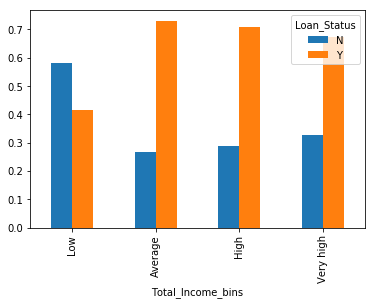

In [91]:
Total_Income_bin.div(Total_Income_bin.sum(1), axis =0).plot.bar()

Text(0, 0.5, 'Percentage')

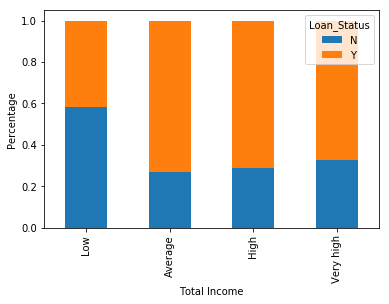

In [92]:
Total_Income_bin.div(Total_Income_bin.sum(1), axis =0).plot(kind = 'bar', stacked =True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')

Applicants with Low income have two time higher rejection level than other with Higher income

# 4.2.1 Let’s visualize the Loan amount variable.

In [93]:
train['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [94]:
bins = [0, 100, 200, 700]
group = ['Low','Average','High',]
train['Loan_Amount_bins'] = pd.cut(train['LoanAmount'], bins, labels = group)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins,Coapplicant_Income_bins,Total_Income,Total_Income_bins,Loan_Amount_bins
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,No,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Low,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,No,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Low,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,No,6000.0,High,Average


In [95]:
Loan_Amount_bin = pd.crosstab(train['Loan_Amount_bins'], train['Loan_Status'])
Loan_Amount_bin

Loan_Status,N,Y
Loan_Amount_bins,,
Low,47,107
Average,103,255
High,31,49


In [96]:
Loan_Amount_bin.div(Loan_Amount_bin.sum())

Loan_Status,N,Y
Loan_Amount_bins,,
Low,0.259669,0.260341
Average,0.569061,0.620438
High,0.171271,0.119221


In [97]:
Loan_Amount_bin.div(Loan_Amount_bin.sum(1), axis = 0)

Loan_Status,N,Y
Loan_Amount_bins,,
Low,0.305195,0.694805
Average,0.287709,0.712291
High,0.387500,0.612500


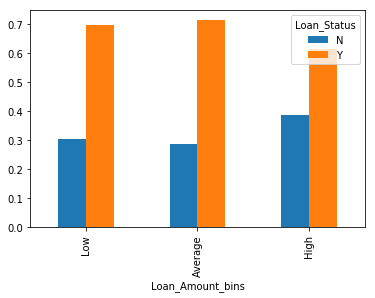

In [98]:
Loan_Amount_bin.div(Loan_Amount_bin.sum(1), axis =0).plot(kind = 'bar')

Text(0, 0.5, 'Percentage')

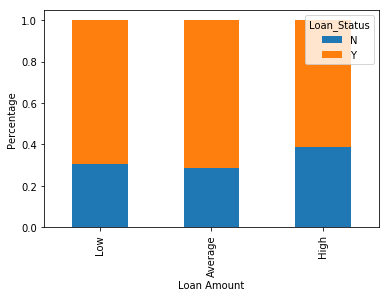

In [99]:
Loan_Amount_bin.div(Loan_Amount_bin.sum(1), axis =0).plot(kind = 'bar', stacked =True)
plt.xlabel('Loan Amount')
plt.ylabel('Percentage')

Applicants how asked for higher loan amout have higher rejection level than other with lower loan amount

In [100]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins,Coapplicant_Income_bins,Total_Income,Total_Income_bins,Loan_Amount_bins
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,No,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Low,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,No,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Low,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,No,6000.0,High,Average


In [101]:
train['Dependents'].describe()

count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object

In [102]:
train.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [103]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

# 4.2.2 Let’s visualize correlation between all the numerical variables

In [104]:
#train_new = train.copy()

In [105]:
Correlation_Matrix = train.corr()
Correlation_Matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,0.893037
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,0.342781
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,0.624621
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.069948
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,-0.015109
Total_Income,0.893037,0.342781,0.624621,-0.069948,-0.015109,1.000000


In [106]:
Correlation_Matrix.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.381220,0.225477,0.402527,0.144297,0.160193,0.462564
std,0.503457,0.415986,0.395253,0.421226,0.411473,0.453100
min,-0.116605,-0.116605,-0.008433,-0.069948,-0.015109,-0.069948
25%,-0.037658,-0.045423,0.076740,-0.056235,-0.013144,0.074364
50%,0.278097,0.093282,0.379764,-0.021918,-0.005245,0.483701
75%,0.812505,0.304240,0.611193,0.029953,0.000589,0.825933
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [107]:
train_new = train.copy()
train['Dependents'].replace('3+',3, inplace = True)
test['Dependents'].replace('3+',3, inplace = True)

train['Loan_Status'].replace('N',0, inplace = True)
train['Loan_Status'].replace('Y',1, inplace = True)

In [108]:
train.dtypes

Loan_ID                      object
Gender                       object
Married                      object
Dependents                   object
Education                    object
Self_Employed                object
ApplicantIncome               int64
CoapplicantIncome           float64
LoanAmount                  float64
Loan_Amount_Term            float64
Credit_History              float64
Property_Area                object
Loan_Status                   int64
Income_bins                category
Coapplicant_Income_bins    category
Total_Income                float64
Total_Income_bins          category
Loan_Amount_bins           category
dtype: object

In [109]:
train['Dependents'] = train['Dependents'].apply(lambda x: int(x) if pd.notnull(x) else x)
train.Dependents.value_counts()

0.0    345
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64

In [110]:
test['Dependents'] = test['Dependents'].apply(lambda x: int(x) if pd.notnull(x) else x)
test.Dependents.value_counts()

0.0    200
2.0     59
1.0     58
3.0     40
Name: Dependents, dtype: int64

In [111]:
train.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income
Dependents,1.000000,0.118679,0.027259,0.163997,-0.100484,-0.050082,0.006781,0.124597
ApplicantIncome,0.118679,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710,0.893037
CoapplicantIncome,0.027259,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187,0.342781
LoanAmount,0.163997,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318,0.624621
Loan_Amount_Term,-0.100484,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268,-0.069948
Credit_History,-0.050082,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678,-0.015109
Loan_Status,0.006781,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000,-0.031271
Total_Income,0.124597,0.893037,0.342781,0.624621,-0.069948,-0.015109,-0.031271,1.000000


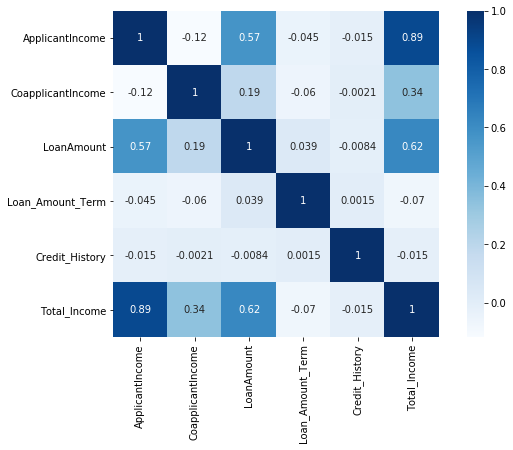

In [112]:
f, ax = plt.subplots(figsize =(10,6))
sns.heatmap(Correlation_Matrix, square = True, cmap = 'Blues', annot=True)

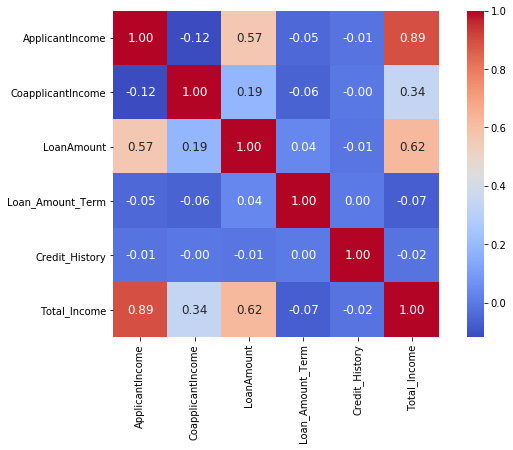

In [113]:
f, ax = plt.subplots(figsize =(10,6))
sns.heatmap(Correlation_Matrix, square = True, cmap = 'coolwarm', annot=True, fmt=".2f", annot_kws={'size':12})

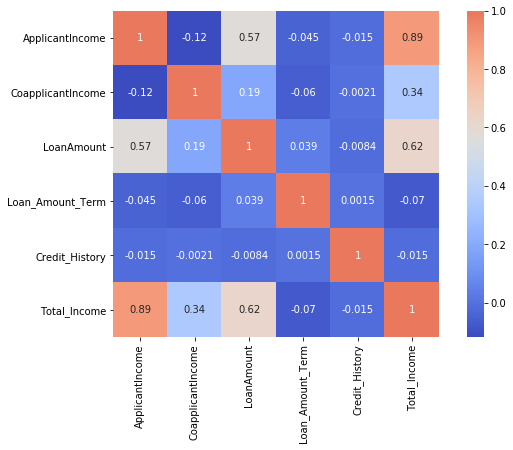

In [114]:
midpoint = (Correlation_Matrix.values.max()- Correlation_Matrix.values.min())/2
f, ax = plt.subplots(figsize =(10,6))
sns.heatmap(Correlation_Matrix, square = True, cmap = 'coolwarm', annot=True, center = midpoint, robust=True)

In [115]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins,Coapplicant_Income_bins,Total_Income,Total_Income_bins,Loan_Amount_bins
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,High,No,5849.0,High,NaN
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,High,Low,6091.0,Very high,Average
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,Average,No,3000.0,Average,Low
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,Average,Low,4941.0,High,Average
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,High,No,6000.0,High,Average


In [116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
Loan_ID                    614 non-null object
Gender                     601 non-null object
Married                    611 non-null object
Dependents                 599 non-null float64
Education                  614 non-null object
Self_Employed              582 non-null object
ApplicantIncome            614 non-null int64
CoapplicantIncome          614 non-null float64
LoanAmount                 592 non-null float64
Loan_Amount_Term           600 non-null float64
Credit_History             564 non-null float64
Property_Area              614 non-null object
Loan_Status                614 non-null int64
Income_bins                614 non-null category
Coapplicant_Income_bins    614 non-null category
Total_Income               614 non-null float64
Total_Income_bins          614 non-null category
Loan_Amount_bins           592 non-null category
dtypes: category(4), float64(6), int6

# 5. Missing value imputation

In [117]:
train.isnull().sum()

Loan_ID                     0
Gender                     13
Married                     3
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Property_Area               0
Loan_Status                 0
Income_bins                 0
Coapplicant_Income_bins     0
Total_Income                0
Total_Income_bins           0
Loan_Amount_bins           22
dtype: int64

In [118]:
train['Gender'].isnull().any()

True

In [119]:
# columns that are containing missing values
train.columns[train.isnull().any()]

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Amount_bins'],
      dtype='object')

In [120]:
Gender_null = train[train['Gender'].isnull()]
Gender_null

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins,Coapplicant_Income_bins,Total_Income,Total_Income_bins,Loan_Amount_bins
23,LP001050,NaN,Yes,2.0,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,0,Average,Low,5282.0,High,Average
126,LP001448,NaN,Yes,3.0,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,1,Very high,No,23803.0,Very high,High
171,LP001585,NaN,Yes,3.0,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,1,Very high,No,51763.0,Very high,High
188,LP001644,NaN,Yes,0.0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,1,Low,High,5970.0,High,Average
314,LP002024,NaN,Yes,0.0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,0,Low,Low,4316.0,High,Average
334,LP002103,NaN,Yes,1.0,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,1,Very high,Low,11666.0,Very high,Average
460,LP002478,NaN,Yes,0.0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,1,Low,High,6166.0,Very high,Average
467,LP002501,NaN,Yes,0.0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,1,Very high,No,16692.0,Very high,Average
477,LP002530,NaN,Yes,2.0,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,0,Average,Low,4745.0,High,Average
507,LP002625,NaN,No,0.0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,0,Average,No,3583.0,Average,Low


In [121]:
train.isnull().sum()

Loan_ID                     0
Gender                     13
Married                     3
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Property_Area               0
Loan_Status                 0
Income_bins                 0
Coapplicant_Income_bins     0
Total_Income                0
Total_Income_bins           0
Loan_Amount_bins           22
dtype: int64

# 5.1 Gender missing value

# Training set

In [122]:
train['Gender'].count()

601

In [123]:
# Normalize can be set to True to print proportions instead of number 
train['Gender'].value_counts(normalize=True)

Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

In [124]:
np.random.random() 

0.9987315887600503

In [125]:
# score = Female percentage = 0.18 = 18%
score = train['Gender'].value_counts(normalize=True)[1] 
score

0.18635607321131448

In [126]:
train['Gender'] = train['Gender'].apply(lambda x: x if pd.notnull(x) else 'Male' if random.random()> score else 'Female')

In [127]:
train['Gender'].value_counts(normalize=True)

Male      0.815961
Female    0.184039
Name: Gender, dtype: float64

# Test data

In [128]:
test.isnull().sum()

Loan_ID                     0
Gender                     11
Married                     0
Dependents                 10
Education                   0
Self_Employed              23
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  5
Loan_Amount_Term            6
Credit_History             29
Property_Area               0
Income_bins                 0
Coapplicant_Income_bins     0
Total_Income                0
Total_Income_bins           0
dtype: int64

In [129]:
test['Gender'].value_counts(normalize=True)

Male      0.803371
Female    0.196629
Name: Gender, dtype: float64

In [130]:
# score = Female percentage = 0.18 = 18%
score = test['Gender'].value_counts(normalize=True)[1] 
score

0.19662921348314608

In [131]:
test['Gender'] = test['Gender'].apply(lambda x: x if pd.notnull(x) else 'Male' if random.random()> score else 'Female')

In [132]:
test['Gender'].value_counts(normalize=True)

Male      0.80654
Female    0.19346
Name: Gender, dtype: float64

# 5.2 Married missing value

# Training set

In [133]:
train.isnull().sum()

Loan_ID                     0
Gender                      0
Married                     3
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Property_Area               0
Loan_Status                 0
Income_bins                 0
Coapplicant_Income_bins     0
Total_Income                0
Total_Income_bins           0
Loan_Amount_bins           22
dtype: int64

In [134]:
train['Married'].value_counts(normalize=True)

Yes    0.651391
No     0.348609
Name: Married, dtype: float64

In [135]:
# score = Not Mariied percentage = 0.34 = 34%
score = train['Married'].value_counts(normalize=True)[1] 
score

0.3486088379705401

In [136]:
train['Married'] = train['Married'].apply(lambda x: x if pd.notnull(x) else 'Yes' if random.random()> score   else 'No')

In [137]:
train['Married'].value_counts(normalize=True)

Yes    0.649837
No     0.350163
Name: Married, dtype: float64

# Test data

In [138]:
test.isnull().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                 10
Education                   0
Self_Employed              23
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  5
Loan_Amount_Term            6
Credit_History             29
Property_Area               0
Income_bins                 0
Coapplicant_Income_bins     0
Total_Income                0
Total_Income_bins           0
dtype: int64

# 5.3 Dependents missing value

# Training data

In [139]:
train.isnull().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Property_Area               0
Loan_Status                 0
Income_bins                 0
Coapplicant_Income_bins     0
Total_Income                0
Total_Income_bins           0
Loan_Amount_bins           22
dtype: int64

In [140]:
train['Dependents'].value_counts(normalize=True)

0.0    0.575960
1.0    0.170284
2.0    0.168614
3.0    0.085142
Name: Dependents, dtype: float64

In [141]:
# score = Self_Employed percentage = 0.34 = 34%
score = train['Dependents'].value_counts(normalize=True)
score

0.0    0.575960
1.0    0.170284
2.0    0.168614
3.0    0.085142
Name: Dependents, dtype: float64

In [142]:
score[[0]]

0    0.57596
Name: Dependents, dtype: float64

In [143]:
score[[0]].values[0]

0.5759599332220368

In [144]:
x0 = score[[0]].values[0]
x1 = score[[1]].values[0]
x2 = score[[2]].values[0]
x3 = score[[3]].values[0]

In [145]:
x2

0.1686143572621035

In [146]:
x2.dtype

dtype('float64')

In [147]:
def Dependents_function(random_number, x1, x2, x3):
    #random_number= random.random()
    #score = train['Dependents'].value_counts(normalize=True)
    if random_number < x3:
        return 3
    if random_number < (x3 + x2):
        return 2
    elif random_number < (x3 + x2 + x1):
        return 1
    else:
        return 0


In [148]:
szam = Dependents_function(random.random(), x1, x2, x3)
szam

0

In [149]:
train['Dependents'] = train['Dependents'].apply(lambda x: x if pd.notnull(x) else Dependents_function(random.random(), x1, x2, x3))

In [150]:
train['Dependents'].value_counts(normalize=True)

0.0    0.571661
1.0    0.175896
2.0    0.169381
3.0    0.083062
Name: Dependents, dtype: float64

In [151]:
train['Dependents'].value_counts()

0.0    351
1.0    108
2.0    104
3.0     51
Name: Dependents, dtype: int64

In [152]:
train.isnull().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Property_Area               0
Loan_Status                 0
Income_bins                 0
Coapplicant_Income_bins     0
Total_Income                0
Total_Income_bins           0
Loan_Amount_bins           22
dtype: int64

# Test data

In [153]:
test.isnull().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                 10
Education                   0
Self_Employed              23
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  5
Loan_Amount_Term            6
Credit_History             29
Property_Area               0
Income_bins                 0
Coapplicant_Income_bins     0
Total_Income                0
Total_Income_bins           0
dtype: int64

In [154]:
test['Dependents'].value_counts(normalize=True)

0.0    0.560224
2.0    0.165266
1.0    0.162465
3.0    0.112045
Name: Dependents, dtype: float64

In [155]:
# score = Self_Employed percentage = 0.34 = 34%
score = test['Dependents'].value_counts(normalize=True)
score

0.0    0.560224
2.0    0.165266
1.0    0.162465
3.0    0.112045
Name: Dependents, dtype: float64

In [156]:
x0 = score[[0]].values[0]
x1 = score[[1]].values[0]
x2 = score[[2]].values[0]
x3 = score[[3]].values[0]

In [157]:
test['Dependents'] = test['Dependents'].apply(lambda x: x if pd.notnull(x) else Dependents_function(random.random(), x1, x2, x3))

In [158]:
test['Dependents'].value_counts(normalize=True)

0.0    0.564033
2.0    0.163488
1.0    0.160763
3.0    0.111717
Name: Dependents, dtype: float64

# 5.4 Self_Employed missing value

# Training data

In [159]:
train['Self_Employed'].value_counts(normalize=True)

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

In [160]:
# score = Self_Employed percentage = 0.34 = 34%
score = train['Self_Employed'].value_counts(normalize=True)[1] 
score

0.140893470790378

In [161]:
train['Self_Employed'] = train['Self_Employed'].apply(lambda x: x if pd.notnull(x) else 'No' if random.random()> score   else 'Yes')

In [162]:
train['Self_Employed'].value_counts(normalize=True)

No     0.856678
Yes    0.143322
Name: Self_Employed, dtype: float64

In [163]:
train['Dependents'].value_counts(normalize=True)

0.0    0.571661
1.0    0.175896
2.0    0.169381
3.0    0.083062
Name: Dependents, dtype: float64

# Test data

In [164]:
test.isnull().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed              23
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  5
Loan_Amount_Term            6
Credit_History             29
Property_Area               0
Income_bins                 0
Coapplicant_Income_bins     0
Total_Income                0
Total_Income_bins           0
dtype: int64

In [165]:
test['Self_Employed'].value_counts(normalize=True)

No     0.892442
Yes    0.107558
Name: Self_Employed, dtype: float64

In [166]:
# score = Self_Employed percentage = 0.34 = 34%
score = test['Self_Employed'].value_counts(normalize=True)[1] 
score

0.10755813953488372

In [167]:
test['Self_Employed'] = test['Self_Employed'].apply(lambda x: x if pd.notnull(x) else 'No' if random.random()> score   else 'Yes')

In [168]:
test['Self_Employed'].value_counts(normalize=True)

No     0.888283
Yes    0.111717
Name: Self_Employed, dtype: float64

# 5.5 Credit_History missing value

# Training set

In [169]:
train.isnull().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Property_Area               0
Loan_Status                 0
Income_bins                 0
Coapplicant_Income_bins     0
Total_Income                0
Total_Income_bins           0
Loan_Amount_bins           22
dtype: int64

In [170]:
# score = 1 = Yes percentage = 0.15 = 15%
train['Credit_History'].value_counts(normalize=True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

In [171]:
score = train['Credit_History'].value_counts(normalize=True)[0]
score

0.15780141843971632

In [172]:
train['Credit_History'] = train['Credit_History'].apply(lambda x: x if pd.notnull(x) else 1 if random.random()> score else 0)

In [173]:
train['Credit_History'].value_counts(normalize=True)

1.0    0.845277
0.0    0.154723
Name: Credit_History, dtype: float64

# Test data

In [174]:
test.isnull().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  5
Loan_Amount_Term            6
Credit_History             29
Property_Area               0
Income_bins                 0
Coapplicant_Income_bins     0
Total_Income                0
Total_Income_bins           0
dtype: int64

In [175]:
test['Credit_History'].value_counts(normalize=True)

1.0    0.825444
0.0    0.174556
Name: Credit_History, dtype: float64

In [176]:
score = test['Credit_History'].value_counts(normalize=True)[0]
score

0.17455621301775148

In [177]:
test['Credit_History'] = test['Credit_History'].apply(lambda x: x if pd.notnull(x) else 1 if random.random()> score else 0)

In [178]:
test['Credit_History'].value_counts(normalize=True)

1.0    0.831063
0.0    0.168937
Name: Credit_History, dtype: float64

# 5.6 LoanAmount missing value

# Training set

In [179]:
train.isnull().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History              0
Property_Area               0
Loan_Status                 0
Income_bins                 0
Coapplicant_Income_bins     0
Total_Income                0
Total_Income_bins           0
Loan_Amount_bins           22
dtype: int64

In [180]:
train['LoanAmount'].value_counts(normalize=True)

120.0    0.033784
110.0    0.028716
100.0    0.025338
187.0    0.020270
160.0    0.020270
128.0    0.018581
113.0    0.018581
130.0    0.016892
96.0     0.015203
95.0     0.015203
70.0     0.013514
115.0    0.013514
112.0    0.013514
150.0    0.011824
135.0    0.011824
136.0    0.011824
132.0    0.011824
125.0    0.011824
104.0    0.011824
80.0     0.010135
81.0     0.010135
138.0    0.010135
90.0     0.010135
158.0    0.010135
116.0    0.010135
175.0    0.010135
144.0    0.010135
155.0    0.010135
180.0    0.010135
152.0    0.008446
           ...   
315.0    0.001689
101.0    0.001689
73.0     0.001689
142.0    0.001689
48.0     0.001689
164.0    0.001689
83.0     0.001689
191.0    0.001689
166.0    0.001689
495.0    0.001689
59.0     0.001689
214.0    0.001689
240.0    0.001689
72.0     0.001689
42.0     0.001689
349.0    0.001689
280.0    0.001689
405.0    0.001689
279.0    0.001689
304.0    0.001689
650.0    0.001689
436.0    0.001689
78.0     0.001689
54.0     0.001689
89.0     0

In [181]:
#Determine pivot table
Group_LoanAmount = train.pivot_table(values=["LoanAmount"], index=["Gender","Married","Self_Employed"], aggfunc=np.mean)
Group_LoanAmount

LoanAmount
Gender Married Self_Employed            
Female No      No             114.691176
               Yes            125.800000
       Yes     No             154.428571
               Yes            282.250000
Male   No      No             130.270270
               Yes            176.368421
       Yes     No             152.286667
               Yes            166.711538

In [182]:
for i,row in train.loc[train['LoanAmount'].isnull(),:].iterrows():
  ind = tuple([row['Gender'],row['Married'],row['Self_Employed']])
  train.loc[i,'LoanAmount'] = Group_LoanAmount.loc[ind].values[0]  

In [183]:
Group_LoanAmount = train.pivot_table(values=["LoanAmount"], index=["Gender","Married","Self_Employed"], aggfunc=np.mean)
Group_LoanAmount

LoanAmount
Gender Married Self_Employed            
Female No      No             114.691176
               Yes            125.800000
       Yes     No             154.428571
               Yes            282.250000
Male   No      No             130.270270
               Yes            176.368421
       Yes     No             152.286667
               Yes            166.711538

# Test data

In [184]:
test.isnull().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 5
Loan_Amount_Term           6
Credit_History             0
Property_Area              0
Income_bins                0
Coapplicant_Income_bins    0
Total_Income               0
Total_Income_bins          0
dtype: int64

In [185]:
test['LoanAmount'].value_counts(normalize=True)

150.0    0.033149
125.0    0.030387
110.0    0.027624
100.0    0.024862
90.0     0.024862
120.0    0.024862
187.0    0.024862
130.0    0.022099
108.0    0.022099
135.0    0.019337
80.0     0.016575
104.0    0.013812
122.0    0.013812
185.0    0.013812
176.0    0.013812
160.0    0.013812
131.0    0.013812
200.0    0.013812
65.0     0.011050
123.0    0.011050
180.0    0.011050
152.0    0.011050
102.0    0.011050
70.0     0.011050
138.0    0.011050
116.0    0.011050
143.0    0.011050
105.0    0.011050
126.0    0.011050
140.0    0.011050
           ...   
173.0    0.002762
157.0    0.002762
159.0    0.002762
213.0    0.002762
61.0     0.002762
550.0    0.002762
71.0     0.002762
225.0    0.002762
209.0    0.002762
214.0    0.002762
103.0    0.002762
412.0    0.002762
256.0    0.002762
234.0    0.002762
74.0     0.002762
30.0     0.002762
72.0     0.002762
151.0    0.002762
189.0    0.002762
142.0    0.002762
66.0     0.002762
232.0    0.002762
390.0    0.002762
55.0     0.002762
155.0    0

In [186]:
#Determine pivot table
Group_LoanAmount = test.pivot_table(values=["LoanAmount"], index=["Gender","Married","Self_Employed"], aggfunc=np.mean)
Group_LoanAmount

LoanAmount
Gender Married Self_Employed            
Female No      No             114.925000
               Yes            153.000000
       Yes     No             139.800000
Male   No      No             122.259259
               Yes            128.625000
       Yes     No             144.005714
               Yes            153.214286

In [187]:
for i,row in test.loc[test['LoanAmount'].isnull(),:].iterrows():
  ind = tuple([row['Gender'],row['Married'],row['Self_Employed']])
  test.loc[i,'LoanAmount'] = Group_LoanAmount.loc[ind].values[0] 

In [188]:
#Determine pivot table
Group_LoanAmount = test.pivot_table(values=["LoanAmount"], index=["Gender","Married","Self_Employed"], aggfunc=np.mean)
Group_LoanAmount

LoanAmount
Gender Married Self_Employed            
Female No      No             114.925000
               Yes            153.000000
       Yes     No             139.800000
Male   No      No             122.259259
               Yes            128.625000
       Yes     No             144.005714
               Yes            153.214286

# 5.7 Loan_Amount_Term missing value

# Training data

In [189]:
train.isnull().sum()

Loan_ID                     0
Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term           14
Credit_History              0
Property_Area               0
Loan_Status                 0
Income_bins                 0
Coapplicant_Income_bins     0
Total_Income                0
Total_Income_bins           0
Loan_Amount_bins           22
dtype: int64

In [190]:
train['Loan_Amount_Term'].value_counts(normalize=True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

In [191]:
score = train['Loan_Amount_Term'].value_counts(normalize=True)
score

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

In [192]:
score.values[0]

0.8533333333333334

In [193]:
x2

0.16526610644257703

In [194]:
x0 = score.values[0]
x1 = score.values[1]
x2 = score.values[2]
x3 = score.values[3]

In [195]:
def Loan_Amount_Term_function(random_number, x1, x2, x3):
    #random_number= random.random()
    #score = train['Dependents'].value_counts(normalize=True)
    if random_number < x3:
        return 300
    if random_number < (x3 + x2):
        return 480
    elif random_number < (x3 + x2 + x1):
        return 180
    else:
        return 360

In [196]:
szam = Loan_Amount_Term_function(random.random(), x1, x2, x3)
szam

360

In [197]:
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].apply(lambda x: x if pd.notnull(x) else Loan_Amount_Term_function(random.random(), x1, x2, x3))

In [198]:
train['Loan_Amount_Term'].value_counts(normalize=True)

360.0    0.850163
180.0    0.076547
480.0    0.024430
300.0    0.022801
84.0     0.006515
240.0    0.006515
120.0    0.004886
36.0     0.003257
60.0     0.003257
12.0     0.001629
Name: Loan_Amount_Term, dtype: float64

# Test data

In [199]:
test.isnull().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           6
Credit_History             0
Property_Area              0
Income_bins                0
Coapplicant_Income_bins    0
Total_Income               0
Total_Income_bins          0
dtype: int64

In [200]:
test['Loan_Amount_Term'].value_counts(normalize=True)

360.0    0.861496
180.0    0.060942
480.0    0.022161
300.0    0.019391
240.0    0.011080
84.0     0.008310
6.0      0.002770
120.0    0.002770
36.0     0.002770
350.0    0.002770
12.0     0.002770
60.0     0.002770
Name: Loan_Amount_Term, dtype: float64

In [201]:
score = test['Loan_Amount_Term'].value_counts(normalize=True)
score

360.0    0.861496
180.0    0.060942
480.0    0.022161
300.0    0.019391
240.0    0.011080
84.0     0.008310
6.0      0.002770
120.0    0.002770
36.0     0.002770
350.0    0.002770
12.0     0.002770
60.0     0.002770
Name: Loan_Amount_Term, dtype: float64

In [202]:
x0 = score.values[0]
x1 = score.values[1]
x2 = score.values[2]
x3 = score.values[3] + score.values[4] 

In [203]:
def Loan_Amount_Term_function(random_number, x1, x2, x3):
    #random_number= random.random()
    #score = train['Dependents'].value_counts(normalize=True)
    if random_number < x3:
        return 300
    if random_number < (x3 + x2):
        return 480
    elif random_number < (x3 + x2 + x1):
        return 180
    else:
        return 360

In [204]:
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].apply(lambda x: x if pd.notnull(x) else Loan_Amount_Term_function(random.random(), x1, x2, x3))

In [205]:
test['Loan_Amount_Term'].value_counts(normalize=True)

360.0    0.863760
180.0    0.059946
480.0    0.021798
300.0    0.019074
240.0    0.010899
84.0     0.008174
6.0      0.002725
120.0    0.002725
36.0     0.002725
350.0    0.002725
12.0     0.002725
60.0     0.002725
Name: Loan_Amount_Term, dtype: float64

# 6. New columns - "Bin"-s

In [206]:
train['LoanAmount'].describe()

count    614.000000
mean     146.389469
std       84.076632
min        9.000000
25%      100.250000
50%      128.000000
75%      165.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [207]:
bins = [0, 100, 200, 700]
group = ['Low','Average','High',]
train['Loan_Amount_bins'] = pd.cut(train['LoanAmount'], bins, labels = group)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bins,Coapplicant_Income_bins,Total_Income,Total_Income_bins,Loan_Amount_bins
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,130.27027,360.0,1.0,Urban,1,High,No,5849.0,High,Average
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,0,High,Low,6091.0,Very high,Average
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,1,Average,No,3000.0,Average,Low
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,1,Average,Low,4941.0,High,Average
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,1,High,No,6000.0,High,Average


In [208]:
bins = [0, 100, 200, 700]
group = ['Low','Average','High',]
test['Loan_Amount_bins'] = pd.cut(test['LoanAmount'], bins, labels = group)
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income_bins,Coapplicant_Income_bins,Total_Income,Total_Income_bins,Loan_Amount_bins
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,High,No,5720,High,Average
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Average,Low,4576,High,Average
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,High,Low,6800,Very high,High
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,Low,Average,4886,High,Low
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Average,No,3276,Average,Low


# 7. Outlier detection

# Training data

In [209]:
train.isnull().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Property_Area              0
Loan_Status                0
Income_bins                0
Coapplicant_Income_bins    0
Total_Income               0
Total_Income_bins          0
Loan_Amount_bins           0
dtype: int64

In [210]:
test.isnull().sum()

Loan_ID                    0
Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Property_Area              0
Income_bins                0
Coapplicant_Income_bins    0
Total_Income               0
Total_Income_bins          0
Loan_Amount_bins           0
dtype: int64

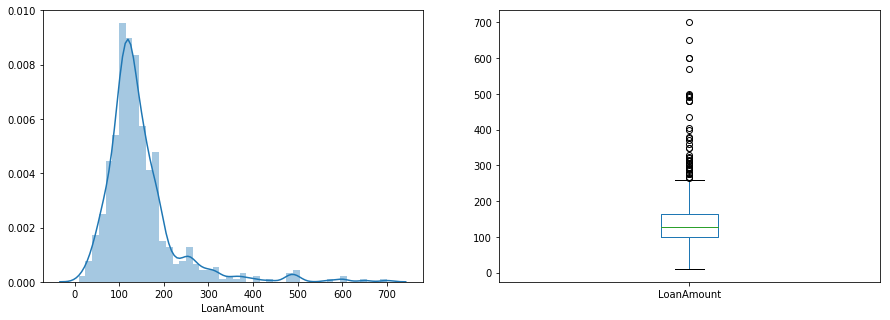

In [211]:
plt.figure(1, figsize = (15,5))

plt.subplot(121)
df = train['LoanAmount'].dropna()
sns.distplot(df)

plt.subplot(122)
df.plot.box()


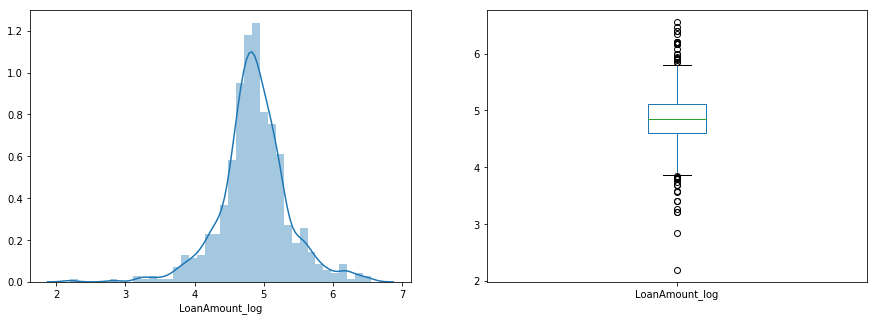

In [212]:
plt.figure(1, figsize = (15,5))

plt.subplot(121)
train['LoanAmount_log'] = np.log(train['LoanAmount'])
sns.distplot(train['LoanAmount_log'])

plt.subplot(122)
train['LoanAmount_log'].plot.box()


# Test data

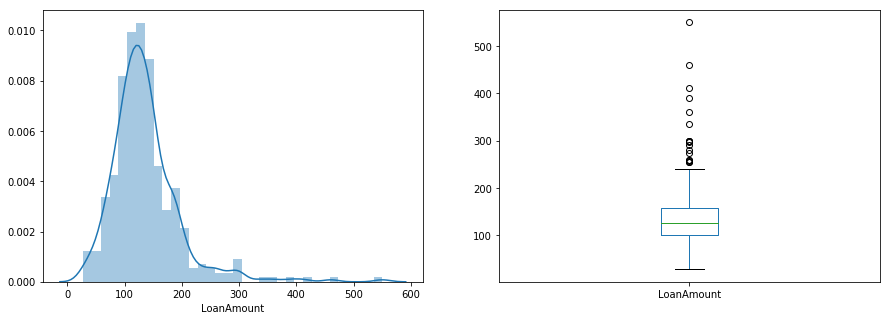

In [213]:
plt.figure(1, figsize = (15,5))
plt.subplot(121)
df = test['LoanAmount'].dropna()
sns.distplot(df)

plt.subplot(122)
df.plot.box()

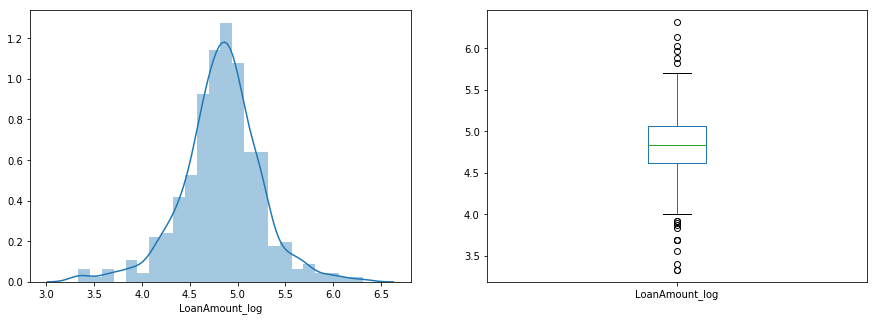

In [214]:
plt.figure(1, figsize = (15,5))

plt.subplot(121)
test['LoanAmount_log'] = np.log(test['LoanAmount'])
sns.distplot(test['LoanAmount_log'])

plt.subplot(122)
test['LoanAmount_log'].plot.box()


# 8. Model - building the base dataset

# 8.1 Preparation

In [215]:
train.sort_index(axis=0, inplace = True)
test.sort_index(axis=0, inplace = True)

In [219]:
test_original=test['Loan_ID']
test_original.columns = ['Loan_ID']
test_original.head()

0    LP001015
1    LP001022
2    LP001031
3    LP001035
4    LP001051
Name: Loan_ID, dtype: object

In [220]:
train = train.drop('Loan_ID', axis =1)
test = test.drop('Loan_ID', axis =1)

In [221]:
y=train.Loan_Status
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [222]:
X=train.drop('Loan_Status',1)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income_bins,Coapplicant_Income_bins,Total_Income,Total_Income_bins,Loan_Amount_bins,LoanAmount_log
0,Male,No,0.0,Graduate,No,5849,0.0,130.27027,360.0,1.0,Urban,High,No,5849.0,High,Average,4.869611
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,High,Low,6091.0,Very high,Average,4.852030
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Average,No,3000.0,Average,Low,4.189655
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Average,Low,4941.0,High,Average,4.787492
4,Male,No,0.0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,High,No,6000.0,High,Average,4.948760


# 8.2 Categorical variable into dummy variable

In [223]:
X = pd.get_dummies(X)
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,LoanAmount_log,Gender_Female,Gender_Male,...,Coapplicant_Income_bins_Average,Coapplicant_Income_bins_High,Coapplicant_Income_bins_Very high,Total_Income_bins_Low,Total_Income_bins_Average,Total_Income_bins_High,Total_Income_bins_Very high,Loan_Amount_bins_Low,Loan_Amount_bins_Average,Loan_Amount_bins_High
0,0.0,5849,0.0,130.27027,360.0,1.0,5849.0,4.869611,0,1,...,0,0,0,0,0,1,0,0,1,0
1,1.0,4583,1508.0,128.00000,360.0,1.0,6091.0,4.852030,0,1,...,0,0,0,0,0,0,1,0,1,0
2,0.0,3000,0.0,66.00000,360.0,1.0,3000.0,4.189655,0,1,...,0,0,0,0,1,0,0,1,0,0
3,0.0,2583,2358.0,120.00000,360.0,1.0,4941.0,4.787492,0,1,...,0,0,0,0,0,1,0,0,1,0
4,0.0,6000,0.0,141.00000,360.0,1.0,6000.0,4.948760,0,1,...,0,0,0,0,0,1,0,0,1,0


In [224]:
train = pd.get_dummies(train)
train.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,LoanAmount_log,Gender_Female,...,Coapplicant_Income_bins_Average,Coapplicant_Income_bins_High,Coapplicant_Income_bins_Very high,Total_Income_bins_Low,Total_Income_bins_Average,Total_Income_bins_High,Total_Income_bins_Very high,Loan_Amount_bins_Low,Loan_Amount_bins_Average,Loan_Amount_bins_High
0,0.0,5849,0.0,130.27027,360.0,1.0,1,5849.0,4.869611,0,...,0,0,0,0,0,1,0,0,1,0
1,1.0,4583,1508.0,128.00000,360.0,1.0,0,6091.0,4.852030,0,...,0,0,0,0,0,0,1,0,1,0
2,0.0,3000,0.0,66.00000,360.0,1.0,1,3000.0,4.189655,0,...,0,0,0,0,1,0,0,1,0,0
3,0.0,2583,2358.0,120.00000,360.0,1.0,1,4941.0,4.787492,0,...,0,0,0,0,0,1,0,0,1,0
4,0.0,6000,0.0,141.00000,360.0,1.0,1,6000.0,4.948760,0,...,0,0,0,0,0,1,0,0,1,0


In [225]:
test = pd.get_dummies(test)
test.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,LoanAmount_log,Gender_Female,Gender_Male,...,Coapplicant_Income_bins_Average,Coapplicant_Income_bins_High,Coapplicant_Income_bins_Very high,Total_Income_bins_Low,Total_Income_bins_Average,Total_Income_bins_High,Total_Income_bins_Very high,Loan_Amount_bins_Low,Loan_Amount_bins_Average,Loan_Amount_bins_High
0,0.0,5720,0,110.0,360.0,1.0,5720,4.700480,0,1,...,0,0,0,0,0,1,0,0,1,0
1,1.0,3076,1500,126.0,360.0,1.0,4576,4.836282,0,1,...,0,0,0,0,0,1,0,0,1,0
2,2.0,5000,1800,208.0,360.0,1.0,6800,5.337538,0,1,...,0,0,0,0,0,0,1,0,0,1
3,2.0,2340,2546,100.0,360.0,1.0,4886,4.605170,0,1,...,1,0,0,0,0,1,0,1,0,0
4,0.0,3276,0,78.0,360.0,1.0,3276,4.356709,0,1,...,0,0,0,0,1,0,0,1,0,0


# 8.3 Split train dataset - train(70%) + validation(30%)

In [226]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3)

# 9. Model - Logistic Regression

In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [228]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# 9.1 Prediction for validation dataset

In [229]:
pred_cv=model.predict(x_cv)

In [230]:
accuracy_score(y_cv, pred_cv)

0.8162162162162162

# 9.2 Prediction for sample dataset

In [231]:
pred_test = model.predict(test)

In [232]:
submission = pd.read_csv("sample_submission_S7jWYrJ.csv")

In [236]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [237]:
submission['Loan_Status'].replace(0, 'N', inplace =True)
submission['Loan_Status'].replace(1, 'Y', inplace =True)
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [243]:
pd.DataFrame(submission, columns = ['Loan_ID','Loan_Status']).to_csv('Zsombex_logistic_11.csv', index = False)